In [1]:
import pandas as pd
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [4]:
required_cols = [
    "danceability",
    "energy",
    "acousticness",
    "speechiness",
    "tempo",
    "popularity"
]

df = df.dropna(subset=required_cols)


NameError: name 'df' is not defined

In [7]:
import os

print(os.getcwd())
print(os.listdir())
print(os.listdir("case study"))


c:\Users\subod\Desktop\case study\case_study_2026
['.git', '.gitignore', '.python-version', '.venv', 'arnav_visualisations.ipynb', 'asd.ipynb', 'Case Study PS.pdf', 'data', 'main.py', 'pyproject.toml', 'README.md', 'requirements.txt', 'uv.lock']


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'case study'

In [10]:
dfs = load_all_csv_files('data')

Loaded Assamese_songs.csv: 724 rows, 19 columns
Loaded Bengali_songs.csv: 958 rows, 19 columns
Loaded Bhojpuri_songs.csv: 519 rows, 19 columns
Loaded Gujarati_songs.csv: 2115 rows, 19 columns
Loaded Haryanvi_songs.csv: 228 rows, 19 columns
Loaded Hindi_songs.csv: 1184 rows, 19 columns
Loaded Kannada_songs.csv: 3559 rows, 19 columns
Loaded Malayalam_songs.csv: 479 rows, 19 columns
Loaded Marathi_songs.csv: 4699 rows, 19 columns
Loaded Odia_songs.csv: 940 rows, 19 columns
Loaded Old_songs.csv: 2448 rows, 19 columns
Loaded Punjabi_songs.csv: 3818 rows, 19 columns
Loaded Rajasthani_songs.csv: 541 rows, 19 columns
Loaded spotify_data clean.csv: 8582 rows, 15 columns
Loaded Tamil_songs.csv: 4677 rows, 19 columns
Loaded Telugu_songs.csv: 4996 rows, 19 columns
Loaded track_data_final.csv: 8778 rows, 15 columns
Loaded Urdu_songs.csv: 3116 rows, 19 columns


In [9]:
def load_all_csv_files(data_dir='data'):
    dataframes = {}
    
    # Get all CSV files in the directory
    csv_files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
    
    # Read each CSV file
    for csv_file in csv_files:
        file_path = os.path.join(data_dir, csv_file)
        # Use filename without extension as dictionary key
        file_key = csv_file.replace('.csv', '')
        dataframes[file_key] = pd.read_csv(file_path)
        print(f"Loaded {csv_file}: {dataframes[file_key].shape[0]} rows, {dataframes[file_key].shape[1]} columns")
    
    return dataframes

In [12]:
print(df.shape)
print(df["language"].value_counts().head())


NameError: name 'df' is not defined

In [13]:
import pandas as pd

genre_year_language = []

for language, df in dfs.items():

    # skip files without required columns
    if 'year' not in df.columns or 'genre' not in df.columns:
        continue

    temp = (
        df.groupby(['year', 'genre'])
          .size()
          .reset_index(name='song_count')
    )

    temp['language'] = language
    genre_year_language.append(temp)

genre_year_language_df = pd.concat(genre_year_language, ignore_index=True)

genre_year_language_df.head()


ValueError: No objects to concatenate

In [14]:
def assign_genre(row):

    if row['speechiness'] > 0.33:
        return 'Rap'

    elif row['acousticness'] > 0.6 and row['energy'] < 0.4:
        return 'Classical'

    elif row['energy'] > 0.7 and row['tempo'] > 120:
        return 'EDM'

    elif row['danceability'] > 0.6 and row['energy'] >= 0.4:
        return 'Pop'

    else:
        return 'Other'


In [15]:
df['derived_genre'] = df.apply(assign_genre, axis=1)


In [17]:
df['year'] = pd.to_datetime(df['released_date'], errors='coerce').dt.year


In [18]:
df[['year', 'derived_genre']].head()


,year,derived_genre
0,2008.0,Other
1,2020.0,Pop
2,2017.0,Pop
3,NaN,Pop
4,2005.0,Pop


In [19]:
genre_year = (
    df.groupby(['year', 'derived_genre'])
      .size()
      .reset_index(name='song_count')
)


In [22]:
genre_year = (
    df.groupby(['year', 'derived_genre'])
      .size()
      .reset_index(name='song_count')
)
genre_year.head()


,year,derived_genre,song_count
0,2000.0,Classical,11
1,2000.0,EDM,9
2,2000.0,Other,24
3,2000.0,Pop,9
4,2001.0,Classical,12


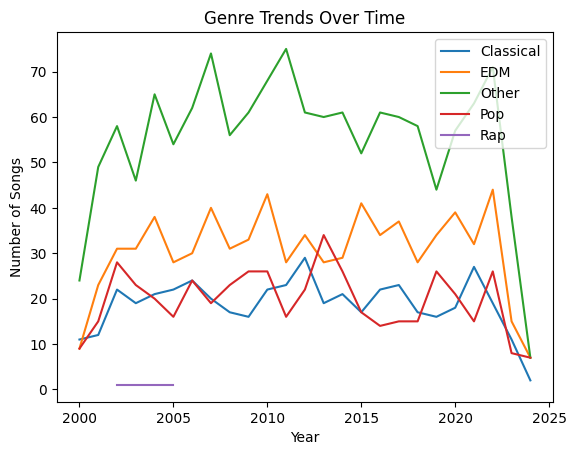

In [23]:
import matplotlib.pyplot as plt

plt.figure()

for genre in genre_year['derived_genre'].unique():
    temp = genre_year[genre_year['derived_genre'] == genre]
    plt.plot(temp['year'], temp['song_count'], label=genre)

plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.title("Genre Trends Over Time")
plt.legend()
plt.show()


In [28]:
language_popularity = []

for language, df in dfs.items():
    if 'stream' in df.columns:
        total_stream = df['stream'].sum()
        language_popularity.append([language, total_stream])

language_popularity_df = pd.DataFrame(
    language_popularity,
    columns=['language', 'total_stream']
)

language_popularity_df


,language,total_stream


In [30]:
for lang, df in dfs.items():
    if 'release_date' in df.columns:
        df['year'] = pd.to_datetime(
            df['release_date'],
            errors='coerce'
        ).dt.year


In [31]:
for lang, df in dfs.items():
    if 'stream' in df.columns:
        df['stream'] = (
            df['stream']
            .astype(str)
            .str.replace(',', '')
        )
        df['stream'] = pd.to_numeric(df['stream'], errors='coerce')
